In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('dataset\\spaceship-titanic\\train.csv')
data_pred = pd.read_csv('dataset\\spaceship-titanic\\test.csv')

In [8]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [63]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0
Group,8693.0,4633.389624,2671.028856,1.0,2319.0,4630.0,6883.0,9280.0
GroupSize,8693.0,2.035546,1.596347,1.0,1.0,1.0,3.0,8.0


In [13]:
x = data['PassengerId'].str.split("_", expand=True)[0].astype(int).unique()
x

array([   1,    2,    3, ..., 9278, 9279, 9280])

In [15]:
y = data_pred['PassengerId'].str.split("_", expand=True)[0].astype(int).unique()
y

array([  13,   18,   19, ..., 9271, 9273, 9277])

In [17]:
# cari kesamaan x dan y, klo kosong gaada yg sama
np.intersect1d(x,y)

array([], dtype=int32)

In [18]:
data['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [20]:
data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [23]:
data['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

<AxesSubplot:xlabel='HomePlanet', ylabel='Transported'>

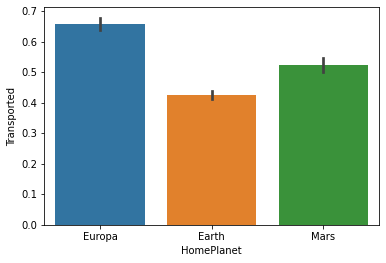

In [19]:
sns.barplot(data=data, x='HomePlanet', y='Transported')

<AxesSubplot:xlabel='CryoSleep', ylabel='Transported'>

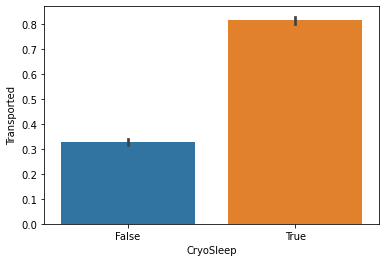

In [21]:
sns.barplot(data=data, x='CryoSleep', y='Transported')

<AxesSubplot:xlabel='Destination', ylabel='Transported'>

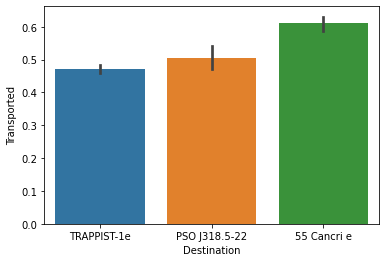

In [22]:
sns.barplot(data=data, x='Destination', y='Transported')

In [27]:
pd.crosstab(data['Transported'], data['Destination']).values

array([[ 702,  395, 3128],
       [1098,  401, 2787]], dtype=int64)

In [85]:
import scipy.stats

a = pd.crosstab(data['Transported'], data['Destination']).values

p = scipy.stats.chi2_contingency(a).pvalues

if p > 0.05:
    print('probably independent')
else:
    print('probably dependent')

AttributeError: 'tuple' object has no attribute 'combine_pvalues'

In [ ]:
a = pd.crosstab(data['Transported'], data['Destination']).values

p = scipy.stats.chi2_contingency(a).pvalue

if p > 0.05:
    print('probably independent')
else:
    print('probably dependent')

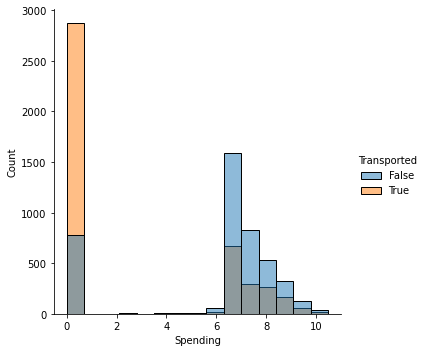

In [40]:
from sklearn.preprocessing import PowerTransformer

x = pd.DataFrame(np.log(data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)+1), columns=['Spending'])
x['Transported']= data['Transported']

sns.displot(data=x, x='Spending', hue='Transported')

In [41]:
pt = PowerTransformer()

x = data[['Age']]
x[['Age']] = pt.fit_transform(x[['Age']])
x[['Transported']] = pt.fit_transform(x[['Transported']])
sns.displot(data=data, x='Age', hue='Transported')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15132\2324860431.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['Age']] = pt.fit_transform(x[['Age']])


KeyError: "None of [Index(['Transported'], dtype='object')] are in the [columns]"

In [43]:
def extract_group(x):
    return int(x.split("_")[0])

def extract_deck(x):
    try:
        return x.split("/")[0]
    except:
        return np.nan
    
def extract_sid(x):
    try:
        return x.split("/")[2]
    except:
        return np.nan

In [46]:
data['Group'] = data['PassengerId'].apply(extract_group)
data['Deck'] = data['Cabin'].apply(extract_deck)
data['Side'] = data['Cabin'].apply(extract_sid)

In [47]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,A,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,G,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,G,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,E,S


In [50]:
data_pred['Group'] = data_pred['PassengerId'].apply(extract_group)
data_pred['Deck'] = data_pred['Cabin'].apply(extract_deck)
data_pred['Side'] = data_pred['Cabin'].apply(extract_sid)

In [54]:
print(data['Deck'].unique())
print(data_pred['Deck'].unique())

['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
['G' 'F' 'C' 'B' 'D' 'E' nan 'A' 'T']


<AxesSubplot:xlabel='Deck', ylabel='Transported'>

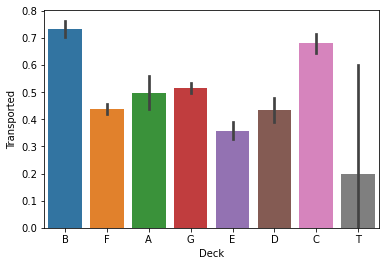

In [49]:
sns.barplot(data=data, x='Deck', y='Transported')

ValueError: Maximum allowed size exceeded

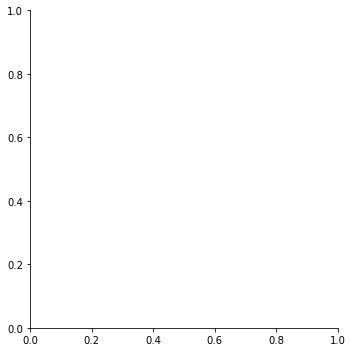

In [57]:
sns.displot(data[['Group', 'PassengerId']].groupby(by='Group').mean())

In [59]:
x = data[['PassengerId', 'Group']].groupby('Group').nunique().rename({"PassengerId":"GroupSize"}, axis=1).reset_index()
data = pd.merge(left=data, right=x, how='left', on='Group')

<AxesSubplot:xlabel='GroupSize', ylabel='Transported'>

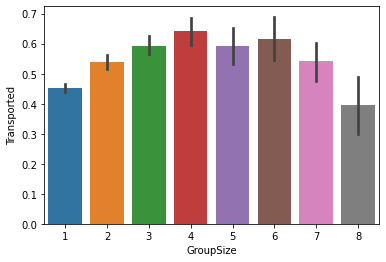

In [60]:
sns.barplot(data=data, x='GroupSize', y='Transported')

In [64]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
 13  Group         4277 non-null   int64  
 14  Deck          4177 non-null   object 
 15  Side          4177 non-null   object 
dtypes: float64(6), int64(1), object(9)
memory usage: 534.8+ KB


In [ ]:
data_pred['Group'] = data_pred['PassengerId'].apply(extract_group)
data_pred['Deck'] = data_pred['Cabin'].apply(extract_deck)
data_pred['Side'] = data_pred['Cabin'].apply(extract_sid)

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, StandardScaler


In [75]:
numerical_var = ['Age', 'GroupSize','Spending']
categorical_var = ['HomePlanet','Cryosleep','Destination','VIP','Deck','Side']
target = 'Transported'

In [79]:
numerical_pipeline = Pipeline
{
    steps = 
    [
        ('num_imputer', SimpleImputer(strategy='median')),
        ('powertransfomer', PowerTransformer()),
        ('scaler', StandardScaler())
    ]
}
categorical_pipeline = Pipeline
{
    steps = 
    [
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('onehotencoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
    ]
}
preprocessor = ColumnTransformer
{
    [
        ('categorical', categorical_pipeline, catergorical_var),
        ('numerical', numerical_pipeline, numerical_var)
        
    ]
}

SyntaxError: invalid syntax (1185488574.py, line 3)

In [80]:
preprocessor.fit_transform[data[categorical_var+numerical_var]]

NameError: name 'preprocessor' is not defined

In [ ]:
import warnings

In [82]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

lr = LogisticRegression(random_state=0)
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
svm = SVC()

x = data[categorical_var+numerical_var]
y = data[targer]

kf = KFold(n_splits=5, random_state=10)

result = {
    'LR':[],
    'DT' :[],
    'RF':[],
    'SVM': []
}

for train_index, test_index in kf.split(x):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]
    
    X_train = preprocessor.fit_transform[X_train]
    X_test = preprocessor.fit_transform[X_test]
    lr.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    
    result['LRc'].append(lr_score(X_test, y_test))
    result['DT'].append(dt_score(X_test, y_test))
    result['RF'].append(rf_score(X_test, y_test))
    result['SVM'].append(svm_score(X_test, y_test))

KeyError: "['Cryosleep', 'Spending'] not in index"

In [84]:
from pprint import print
pprint(result)

ImportError: cannot import name 'print' from 'pprint' (C:\Users\LENOVO\anaconda3\lib\pprint.py)